In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#to run sql queries on dataframe

import pandasql as psql

In [2]:
#Reading the dataset from adult_data

data=pd.read_csv(r"C:\Users\Dlc\Documents\adult_data.csv",header=0)
data_bk=data.copy()
data.head()

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
del data['x']
del data['marital-status']
del data['fnlwgt']
del data['educational-num']
data.head()

,age,workclass,education,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   occupation      48842 non-null  object
 4   relationship    48842 non-null  object
 5   race            48842 non-null  object
 6   gender          48842 non-null  object
 7   capital-gain    48842 non-null  int64 
 8   capital-loss    48842 non-null  int64 
 9   hours-per-week  48842 non-null  int64 
 10  native-country  48842 non-null  object
 11  income          48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [5]:
data.isnull().sum()

age               0
workclass         0
education         0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
data.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [7]:
data['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [8]:
data['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [9]:
data.sample(5)

,age,workclass,education,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
17531,51,Self-emp-inc,Masters,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
28011,30,Private,Doctorate,Prof-specialty,Not-in-family,White,Male,0,0,60,United-States,<=50K
10836,55,Private,Some-college,Other-service,Husband,White,Male,0,0,50,United-States,>50K
40992,40,Self-emp-not-inc,HS-grad,Other-service,Husband,White,Male,0,0,45,United-States,<=50K
34839,31,Private,Some-college,Sales,Husband,White,Male,0,0,40,United-States,<=50K


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   occupation      48842 non-null  object
 4   relationship    48842 non-null  object
 5   race            48842 non-null  object
 6   gender          48842 non-null  object
 7   capital-gain    48842 non-null  int64 
 8   capital-loss    48842 non-null  int64 
 9   hours-per-week  48842 non-null  int64 
 10  native-country  48842 non-null  object
 11  income          48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [11]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [12]:
data.columns

Index(['age', 'workclass', 'education', 'occupation', 'relationship', 'race',
       'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = [ 'workclass', 'education', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Convert the DataFrame to int64
data = data.astype('int64')

# Display the converted DataFrame
print(data)

       age  workclass  education  occupation  relationship  race  gender  \
0       25          4          1           7             3     2       1   
1       38          4         11           5             0     4       1   
2       28          2          7          11             0     4       1   
3       44          4         15           7             0     2       1   
4       18          0         15           0             3     4       0   
...    ...        ...        ...         ...           ...   ...     ...   
48837   27          4          7          13             5     4       0   
48838   40          4         11           7             0     4       1   
48839   58          4         11           1             4     4       0   
48840   22          4         11           1             3     4       1   
48841   52          5         11           4             5     4       0   

       capital-gain  capital-loss  hours-per-week  native-country  income  
0          

In [14]:
data.head()

,age,workclass,education,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,1,7,3,2,1,0,0,40,39,0
1,38,4,11,5,0,4,1,0,0,50,39,0
2,28,2,7,11,0,4,1,0,0,40,39,1
3,44,4,15,7,0,2,1,7688,0,40,39,1
4,18,0,15,0,3,4,0,0,0,30,39,0


In [15]:
#Identify the independent and Target variables
#logistic regression equation for catagorical(binary data(0/1)) is y=c+w1*x1+w2*x2+....wn*xn
#y=1/1+e^-x
IndepVar=[]
for col in data.columns:
    if col !='income':
        IndepVar.append(col)
TargetVar='income'

x=data[IndepVar]
y=data[TargetVar]

In [16]:
# Split the data into Train and Test(random samping)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Display shape for train and test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((34189, 11), (14653, 11), (34189,), (14653,))

In [17]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))

x_train=mmscaler.fit_transform(x_train)
#x_train[cols]=mmscaler.fit_transform(x_train[cols])

x_train=pd.DataFrame(x_train)

x_test=mmscaler.fit_transform(x_test)
#x_test[cols]=mmscaler.fit_transform(x_test[cols])

x_test=pd.DataFrame(x_test)

# KNN

In [18]:
KNN_Results = pd.read_csv(r"C:\Users\Dlc\Downloads\KNN_Results.csv",header=0)
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN Algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[2008 1412]
 [1467 9766]]
Outcome values : 
 2008 1412 1467 9766
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.59      0.58      3420
           0       0.87      0.87      0.87     11233

    accuracy                           0.80     14653
   macro avg       0.73      0.73      0.73     14653
weighted avg       0.80      0.80      0.80     14653

Accuracy : 80.4 %
Precision : 57.8 %
Recall : 58.7 %
F1 Score : 0.582
Specificity or True Negative Rate : 86.9 %
Balanced Accuracy : 72.8 %
MCC : 0.454
roc_auc_score: 0.728


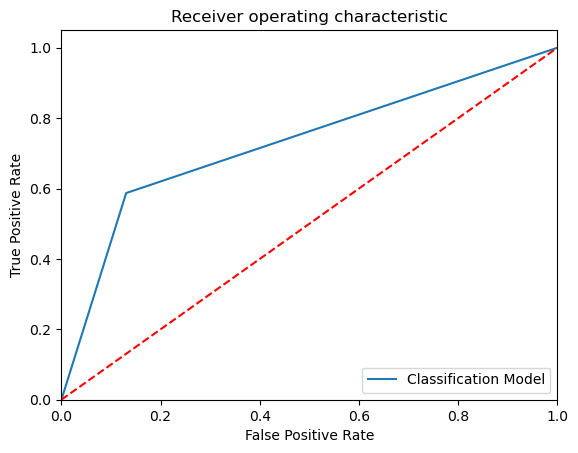

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 1380  2040]
 [  582 10651]]
Outcome values : 
 1380 2040 582 10651
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.40      0.51      3420
           0       0.84      0.95      0.89     11233

    accuracy                           0.82     14653
   macro avg       0.77      0.68      0.70     14653
weighted avg       0.81      0.82      0.80     14653

Accuracy : 82.1 %
Precision : 70.3 %
Recall : 40.4 %
F1 Score : 0.513
Specificity or True Negative Rate : 94.8 %
Balanced Accuracy : 67.6 %
MCC : 0.437
roc_auc_score: 0.676


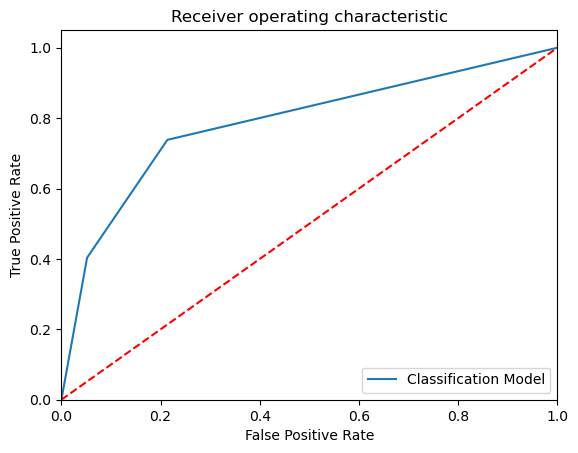

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 1984  1436]
 [ 1150 10083]]
Outcome values : 
 1984 1436 1150 10083
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.58      0.61      3420
           0       0.88      0.90      0.89     11233

    accuracy                           0.82     14653
   macro avg       0.75      0.74      0.75     14653
weighted avg       0.82      0.82      0.82     14653

Accuracy : 82.4 %
Precision : 63.3 %
Recall : 58.0 %
F1 Score : 0.605
Specificity or True Negative Rate : 89.8 %
Balanced Accuracy : 73.9 %
MCC : 0.493
roc_auc_score: 0.739


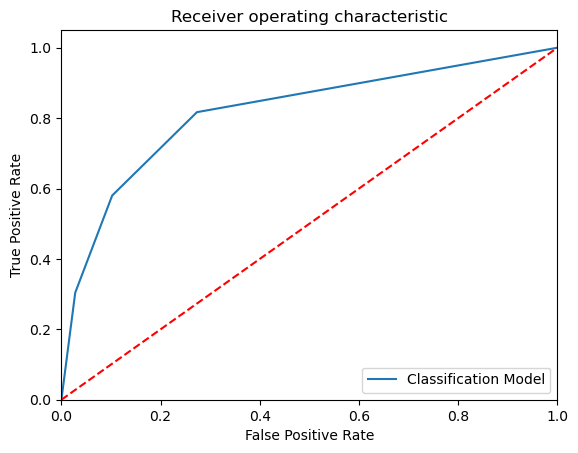

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 1578  1842]
 [  729 10504]]
Outcome values : 
 1578 1842 729 10504
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.46      0.55      3420
           0       0.85      0.94      0.89     11233

    accuracy                           0.82     14653
   macro avg       0.77      0.70      0.72     14653
weighted avg       0.81      0.82      0.81     14653

Accuracy : 82.5 %
Precision : 68.4 %
Recall : 46.1 %
F1 Score : 0.551
Specificity or True Negative Rate : 93.5 %
Balanced Accuracy : 69.8 %
MCC : 0.46
roc_auc_score: 0.698


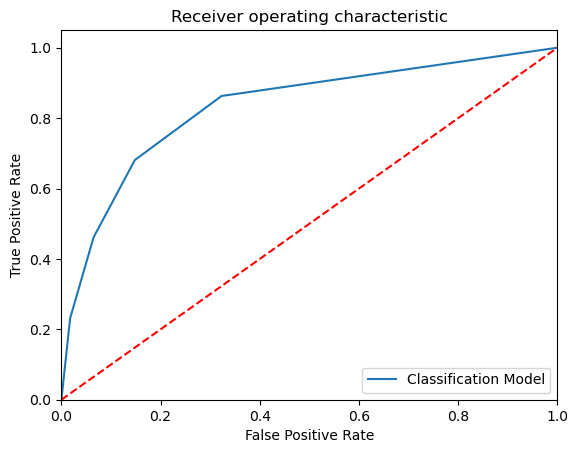

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 1972  1448]
 [ 1080 10153]]
Outcome values : 
 1972 1448 1080 10153
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.58      0.61      3420
           0       0.88      0.90      0.89     11233

    accuracy                           0.83     14653
   macro avg       0.76      0.74      0.75     14653
weighted avg       0.82      0.83      0.82     14653

Accuracy : 82.7 %
Precision : 64.6 %
Recall : 57.7 %
F1 Score : 0.609
Specificity or True Negative Rate : 90.4 %
Balanced Accuracy : 74.0 %
MCC : 0.5
roc_auc_score: 0.74


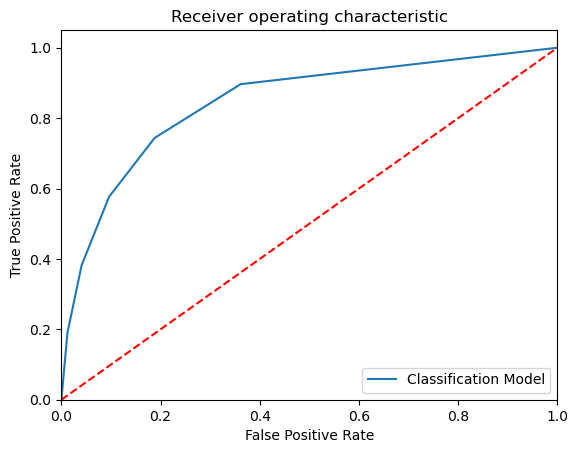

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 1670  1750]
 [  731 10502]]
Outcome values : 
 1670 1750 731 10502
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.49      0.57      3420
           0       0.86      0.93      0.89     11233

    accuracy                           0.83     14653
   macro avg       0.78      0.71      0.73     14653
weighted avg       0.82      0.83      0.82     14653

Accuracy : 83.1 %
Precision : 69.6 %
Recall : 48.8 %
F1 Score : 0.574
Specificity or True Negative Rate : 93.5 %
Balanced Accuracy : 71.2 %
MCC : 0.484
roc_auc_score: 0.712


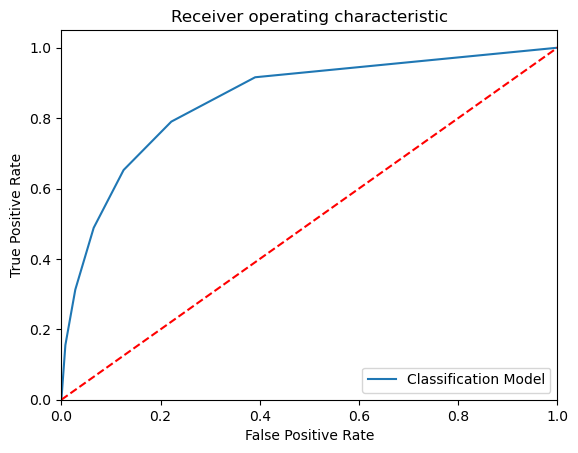

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 1957  1463]
 [ 1020 10213]]
Outcome values : 
 1957 1463 1020 10213
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.57      0.61      3420
           0       0.87      0.91      0.89     11233

    accuracy                           0.83     14653
   macro avg       0.77      0.74      0.75     14653
weighted avg       0.82      0.83      0.83     14653

Accuracy : 83.1 %
Precision : 65.7 %
Recall : 57.2 %
F1 Score : 0.612
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 74.0 %
MCC : 0.506
roc_auc_score: 0.741


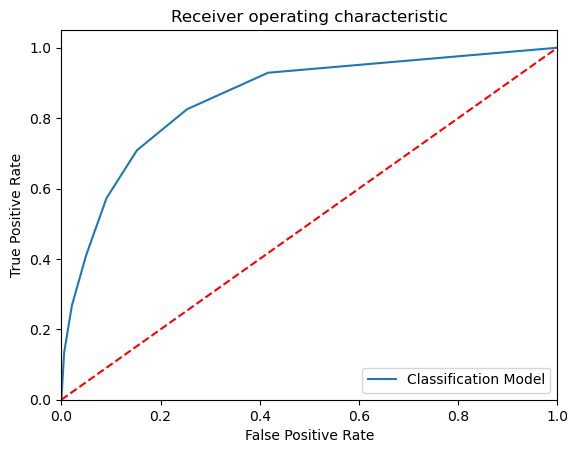

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 1714  1706]
 [  768 10465]]
Outcome values : 
 1714 1706 768 10465
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.50      0.58      3420
           0       0.86      0.93      0.89     11233

    accuracy                           0.83     14653
   macro avg       0.78      0.72      0.74     14653
weighted avg       0.82      0.83      0.82     14653

Accuracy : 83.1 %
Precision : 69.1 %
Recall : 50.1 %
F1 Score : 0.581
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 71.6 %
MCC : 0.488
roc_auc_score: 0.716


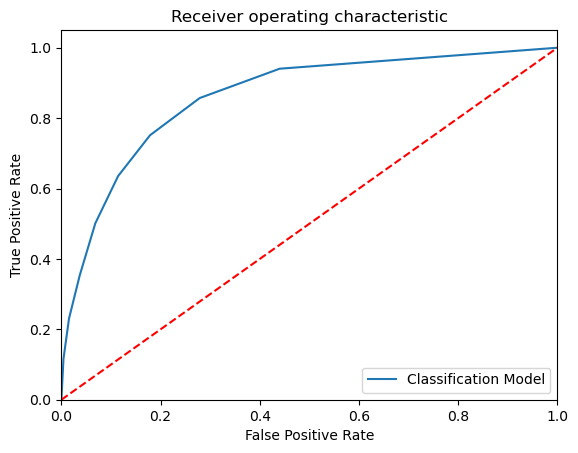

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 1960  1460]
 [  966 10267]]
Outcome values : 
 1960 1460 966 10267
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.57      0.62      3420
           0       0.88      0.91      0.89     11233

    accuracy                           0.83     14653
   macro avg       0.77      0.74      0.76     14653
weighted avg       0.83      0.83      0.83     14653

Accuracy : 83.4 %
Precision : 67.0 %
Recall : 57.3 %
F1 Score : 0.618
Specificity or True Negative Rate : 91.4 %
Balanced Accuracy : 74.4 %
MCC : 0.515
roc_auc_score: 0.744


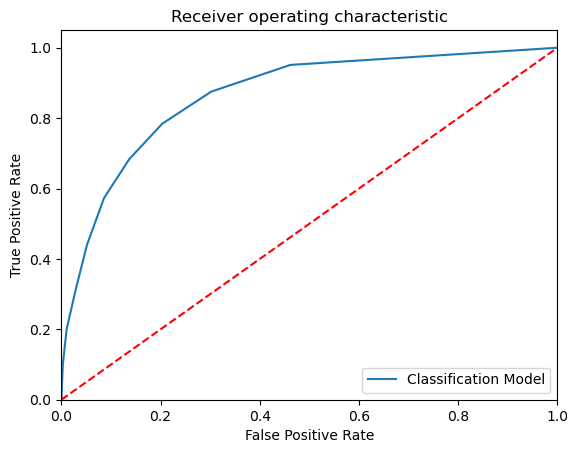

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 1744  1676]
 [  756 10477]]
Outcome values : 
 1744 1676 756 10477
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.51      0.59      3420
           0       0.86      0.93      0.90     11233

    accuracy                           0.83     14653
   macro avg       0.78      0.72      0.74     14653
weighted avg       0.82      0.83      0.82     14653

Accuracy : 83.4 %
Precision : 69.8 %
Recall : 51.0 %
F1 Score : 0.589
Specificity or True Negative Rate : 93.3 %
Balanced Accuracy : 72.2 %
MCC : 0.498
roc_auc_score: 0.721


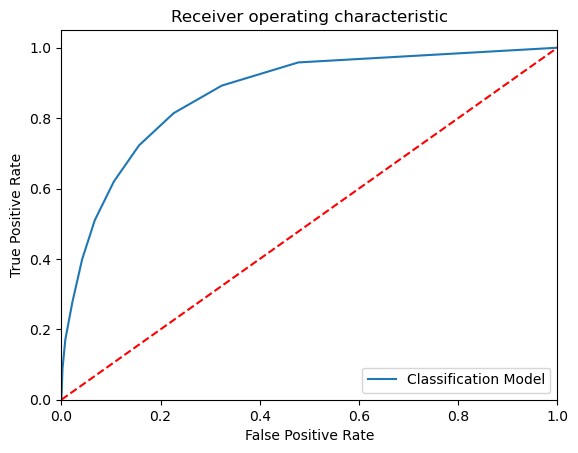

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 1927  1493]
 [  929 10304]]
Outcome values : 
 1927 1493 929 10304
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.56      0.61      3420
           0       0.87      0.92      0.89     11233

    accuracy                           0.83     14653
   macro avg       0.77      0.74      0.75     14653
weighted avg       0.83      0.83      0.83     14653

Accuracy : 83.5 %
Precision : 67.5 %
Recall : 56.3 %
F1 Score : 0.614
Specificity or True Negative Rate : 91.7 %
Balanced Accuracy : 74.0 %
MCC : 0.513
roc_auc_score: 0.74


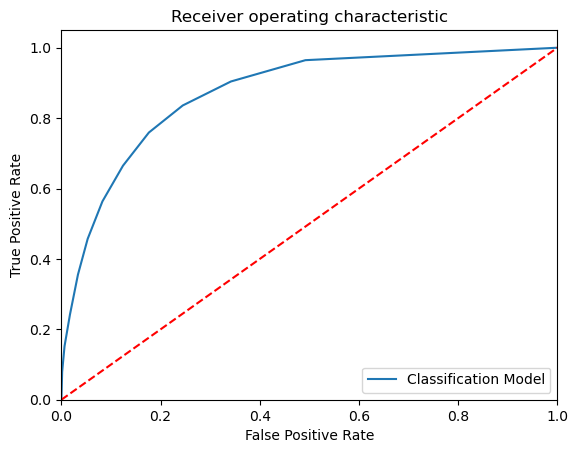

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 1752  1668]
 [  751 10482]]
Outcome values : 
 1752 1668 751 10482
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.51      0.59      3420
           0       0.86      0.93      0.90     11233

    accuracy                           0.83     14653
   macro avg       0.78      0.72      0.74     14653
weighted avg       0.82      0.83      0.83     14653

Accuracy : 83.5 %
Precision : 70.0 %
Recall : 51.2 %
F1 Score : 0.592
Specificity or True Negative Rate : 93.3 %
Balanced Accuracy : 72.2 %
MCC : 0.501
roc_auc_score: 0.723


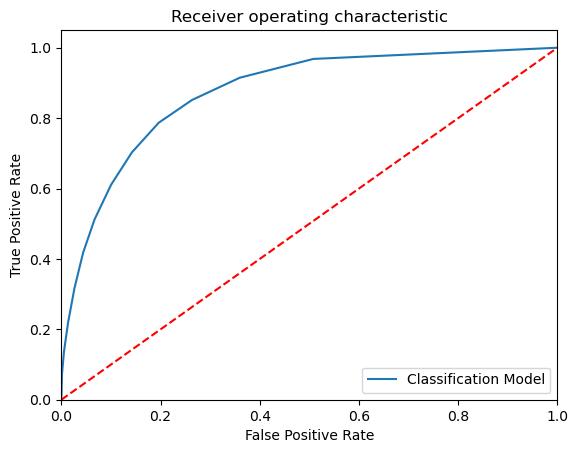

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 1911  1509]
 [  922 10311]]
Outcome values : 
 1911 1509 922 10311
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.56      0.61      3420
           0       0.87      0.92      0.89     11233

    accuracy                           0.83     14653
   macro avg       0.77      0.74      0.75     14653
weighted avg       0.83      0.83      0.83     14653

Accuracy : 83.4 %
Precision : 67.5 %
Recall : 55.9 %
F1 Score : 0.611
Specificity or True Negative Rate : 91.8 %
Balanced Accuracy : 73.8 %
MCC : 0.511
roc_auc_score: 0.738


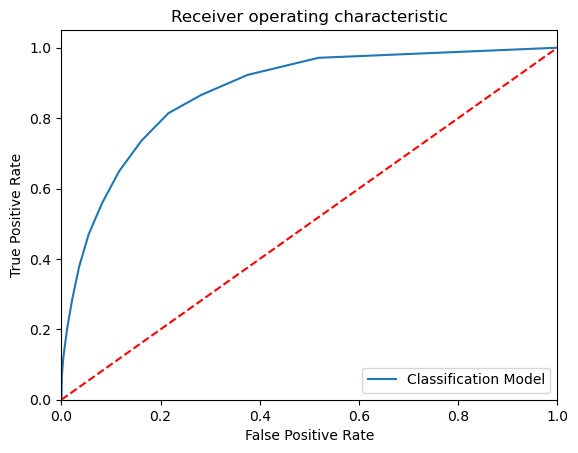

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 1783  1637]
 [  779 10454]]
Outcome values : 
 1783 1637 779 10454
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.52      0.60      3420
           0       0.86      0.93      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.78      0.73      0.75     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 83.5 %
Precision : 69.6 %
Recall : 52.1 %
F1 Score : 0.596
Specificity or True Negative Rate : 93.1 %
Balanced Accuracy : 72.6 %
MCC : 0.503
roc_auc_score: 0.726


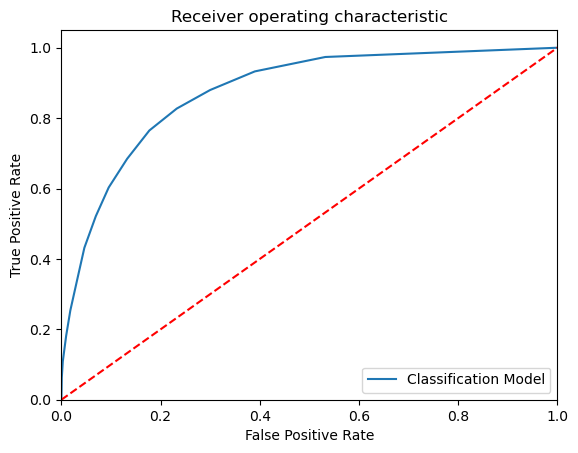

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 1924  1496]
 [  916 10317]]
Outcome values : 
 1924 1496 916 10317
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.56      0.61      3420
           0       0.87      0.92      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.78      0.74      0.76     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 83.5 %
Precision : 67.7 %
Recall : 56.3 %
F1 Score : 0.615
Specificity or True Negative Rate : 91.8 %
Balanced Accuracy : 74.0 %
MCC : 0.515
roc_auc_score: 0.741


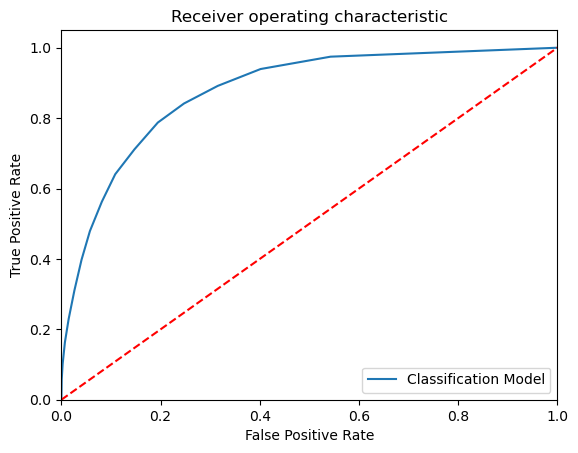

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 1792  1628]
 [  761 10472]]
Outcome values : 
 1792 1628 761 10472
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.52      0.60      3420
           0       0.87      0.93      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.78      0.73      0.75     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 83.7 %
Precision : 70.2 %
Recall : 52.4 %
F1 Score : 0.6
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 72.8 %
MCC : 0.509
roc_auc_score: 0.728


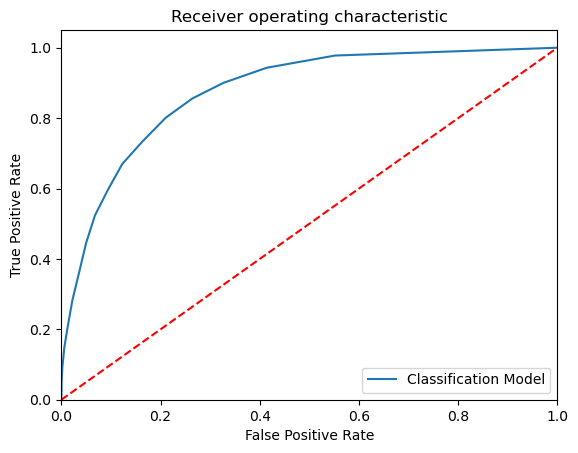

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 1889  1531]
 [  888 10345]]
Outcome values : 
 1889 1531 888 10345
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.55      0.61      3420
           0       0.87      0.92      0.90     11233

    accuracy                           0.83     14653
   macro avg       0.78      0.74      0.75     14653
weighted avg       0.83      0.83      0.83     14653

Accuracy : 83.5 %
Precision : 68.0 %
Recall : 55.2 %
F1 Score : 0.61
Specificity or True Negative Rate : 92.1 %
Balanced Accuracy : 73.6 %
MCC : 0.511
roc_auc_score: 0.737


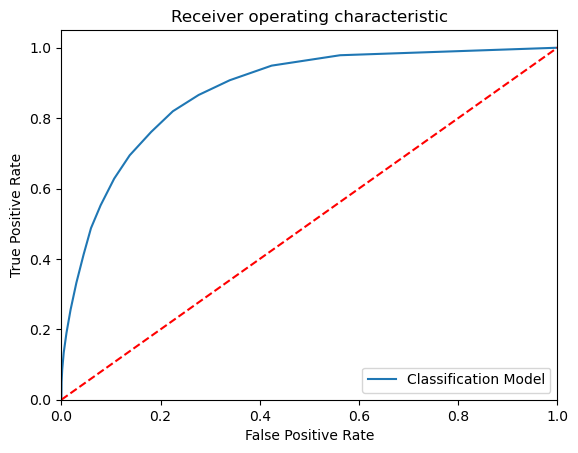

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 1773  1647]
 [  786 10447]]
Outcome values : 
 1773 1647 786 10447
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.52      0.59      3420
           0       0.86      0.93      0.90     11233

    accuracy                           0.83     14653
   macro avg       0.78      0.72      0.74     14653
weighted avg       0.82      0.83      0.83     14653

Accuracy : 83.4 %
Precision : 69.3 %
Recall : 51.8 %
F1 Score : 0.593
Specificity or True Negative Rate : 93.0 %
Balanced Accuracy : 72.4 %
MCC : 0.5
roc_auc_score: 0.724


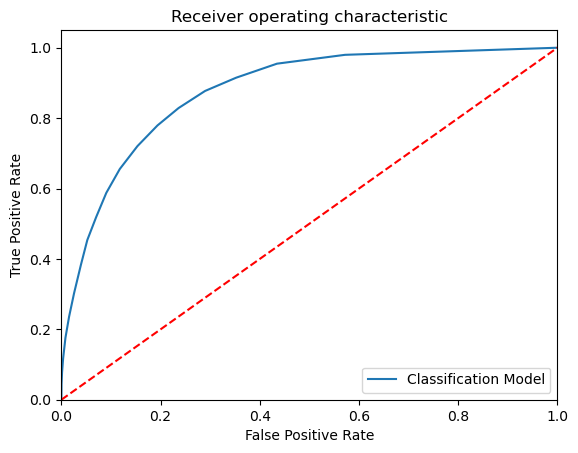

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[ 1891  1529]
 [  883 10350]]
Outcome values : 
 1891 1529 883 10350
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.55      0.61      3420
           0       0.87      0.92      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.78      0.74      0.75     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 83.5 %
Precision : 68.2 %
Recall : 55.3 %
F1 Score : 0.611
Specificity or True Negative Rate : 92.1 %
Balanced Accuracy : 73.7 %
MCC : 0.512
roc_auc_score: 0.737


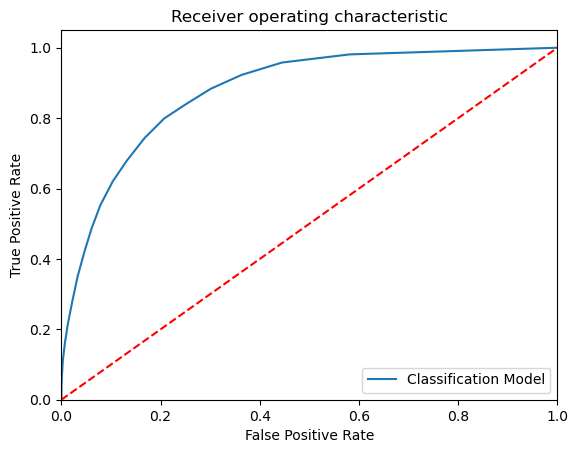

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 1782  1638]
 [  777 10456]]
Outcome values : 
 1782 1638 777 10456
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.52      0.60      3420
           0       0.86      0.93      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.78      0.73      0.75     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 83.5 %
Precision : 69.6 %
Recall : 52.1 %
F1 Score : 0.596
Specificity or True Negative Rate : 93.1 %
Balanced Accuracy : 72.6 %
MCC : 0.503
roc_auc_score: 0.726


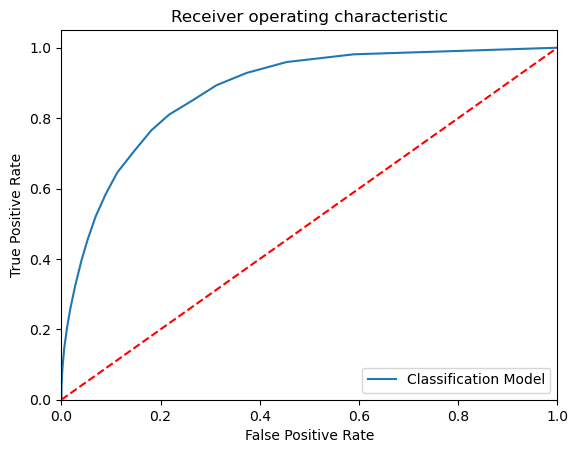

In [19]:
# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results---------------------------------------------------

# svm

In [20]:
# Load the bcdata dataset
EM_Results=pd.read_csv(r"C:\Users\Dlc\Downloads\EMResults (1).csv", header=0) 
EM_Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  SVM - Linear
Confusion matrix : 
 [[ 1010  2410]
 [  420 10813]]
Outcome values : 
 1010 2410 420 10813
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.30      0.42      3420
           0       0.82      0.96      0.88     11233

    accuracy                           0.81     14653
   macro avg       0.76      0.63      0.65     14653
weighted avg       0.79      0.81      0.78     14653

Accuracy : 80.7 %
Precision : 70.6 %
Recall : 29.5 %
F1 Score : 0.416
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 62.9 %
MCC : 0.368
roc_auc_score: 0.629


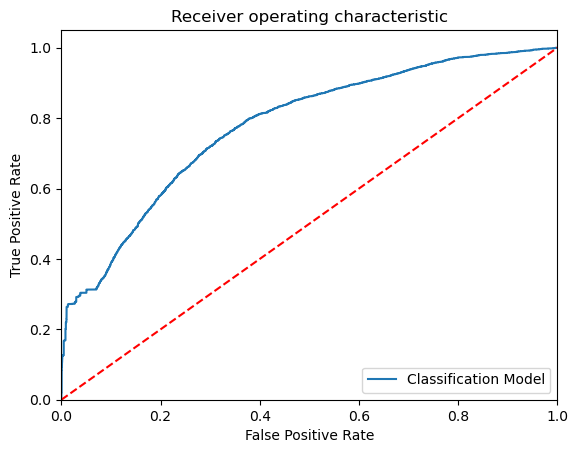

-----------------------------------------------------------------------------------------------------


In [21]:

# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EM_Results.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

# poly kernel

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[  976  2444]
 [  259 10974]]
Outcome values : 
 976 2444 259 10974
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.29      0.42      3420
           0       0.82      0.98      0.89     11233

    accuracy                           0.82     14653
   macro avg       0.80      0.63      0.65     14653
weighted avg       0.81      0.82      0.78     14653

Accuracy : 81.6 %
Precision : 79.0 %
Recall : 28.5 %
F1 Score : 0.419
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 63.1 %
MCC : 0.399
roc_auc_score: 0.631


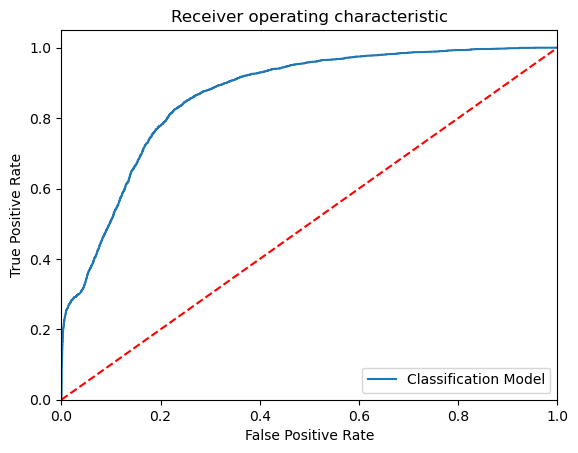

-----------------------------------------------------------------------------------------------------


In [22]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

# Gausiann kernel

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[2996  424]
 [3128 8105]]
Outcome values : 
 2996 424 3128 8105
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.88      0.63      3420
           0       0.95      0.72      0.82     11233

    accuracy                           0.76     14653
   macro avg       0.72      0.80      0.72     14653
weighted avg       0.84      0.76      0.78     14653

Accuracy : 75.8 %
Precision : 48.9 %
Recall : 87.6 %
F1 Score : 0.628
Specificity or True Negative Rate : 72.2 %
Balanced Accuracy : 79.9 %
MCC : 0.512
roc_auc_score: 0.799


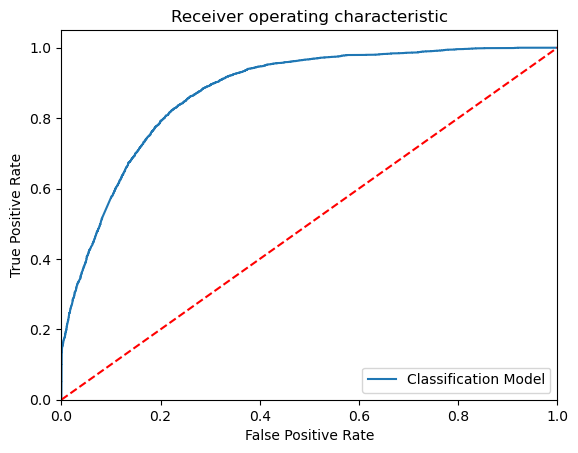

-----------------------------------------------------------------------------------------------------


In [23]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

# sigmoid kernel

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[1510 1910]
 [6640 4593]]
Outcome values : 
 1510 1910 6640 4593
Classification report : 
               precision    recall  f1-score   support

           1       0.19      0.44      0.26      3420
           0       0.71      0.41      0.52     11233

    accuracy                           0.42     14653
   macro avg       0.45      0.43      0.39     14653
weighted avg       0.58      0.42      0.46     14653

Accuracy : 41.7 %
Precision : 18.5 %
Recall : 44.2 %
F1 Score : 0.261
Specificity or True Negative Rate : 40.9 %
Balanced Accuracy : 42.6 %
MCC : -0.127
roc_auc_score: 0.425


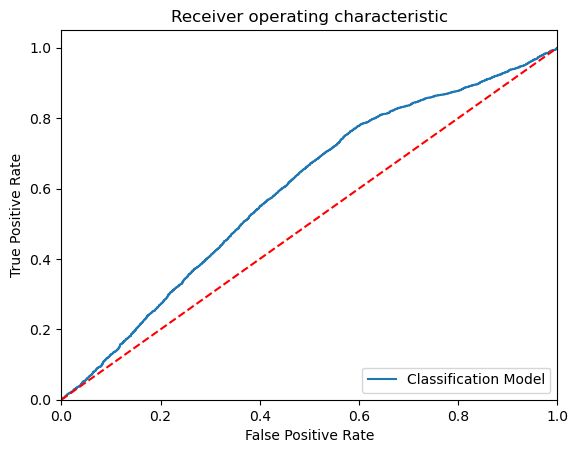

-----------------------------------------------------------------------------------------------------


In [24]:

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

# Compare the classification models

In [25]:
EMResults = pd.read_csv(r"C:\Users\Dlc\Downloads\EMResults (2).csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 1064  2356]
 [  458 10775]]
Outcome values : 
 1064 2356 458 10775
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.31      0.43      3420
           0       0.82      0.96      0.88     11233

    accuracy                           0.81     14653
   macro avg       0.76      0.64      0.66     14653
weighted avg       0.79      0.81      0.78     14653

Accuracy : 80.8 %
Precision : 69.9 %
Recall : 31.1 %
F1 Score : 0.431
Specificity or True Negative Rate : 95.9 %
Balanced Accuracy : 63.5 %
MCC : 0.375
roc_auc_score: 0.635


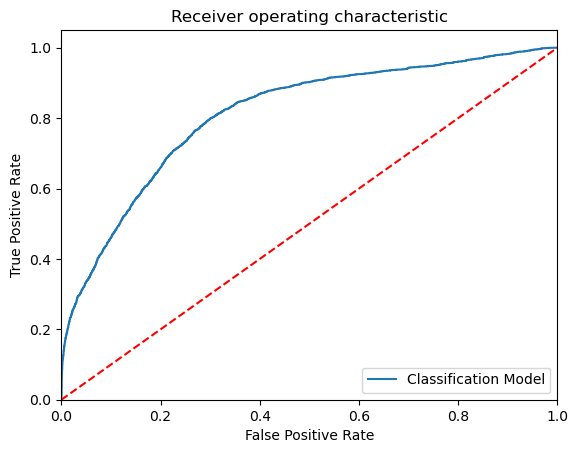

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[2142 1278]
 [1354 9879]]
Outcome values : 
 2142 1278 1354 9879
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.63      0.62      3420
           0       0.89      0.88      0.88     11233

    accuracy                           0.82     14653
   macro avg       0.75      0.75      0.75     14653
weighted avg       0.82      0.82      0.82     14653

Accuracy : 82.0 %
Precision : 61.3 %
Recall : 62.6 %
F1 Score : 0.619
Specificity or True Negative Rate : 87.9 %
Balanced Accuracy : 75.2 %
MCC : 0.502
roc_auc_score: 0.753


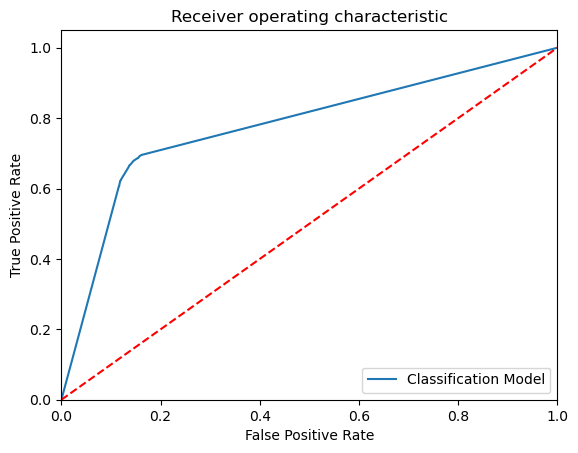

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 2198  1222]
 [  896 10337]]
Outcome values : 
 2198 1222 896 10337
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.64      0.67      3420
           0       0.89      0.92      0.91     11233

    accuracy                           0.86     14653
   macro avg       0.80      0.78      0.79     14653
weighted avg       0.85      0.86      0.85     14653

Accuracy : 85.5 %
Precision : 71.0 %
Recall : 64.3 %
F1 Score : 0.675
Specificity or True Negative Rate : 92.0 %
Balanced Accuracy : 78.2 %
MCC : 0.583
roc_auc_score: 0.781


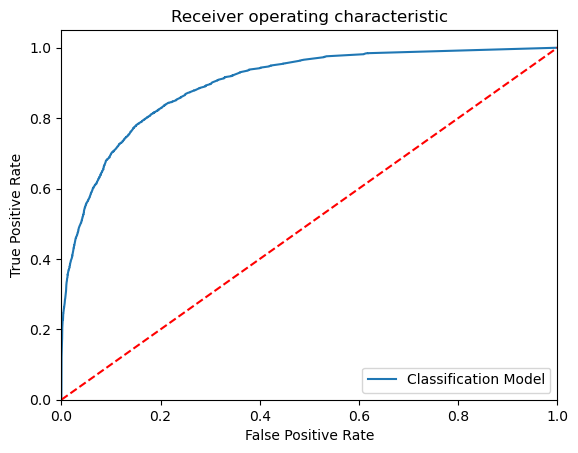

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 2113  1307]
 [  937 10296]]
Outcome values : 
 2113 1307 937 10296
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.62      0.65      3420
           0       0.89      0.92      0.90     11233

    accuracy                           0.85     14653
   macro avg       0.79      0.77      0.78     14653
weighted avg       0.84      0.85      0.84     14653

Accuracy : 84.7 %
Precision : 69.3 %
Recall : 61.8 %
F1 Score : 0.653
Specificity or True Negative Rate : 91.7 %
Balanced Accuracy : 76.8 %
MCC : 0.557
roc_auc_score: 0.767


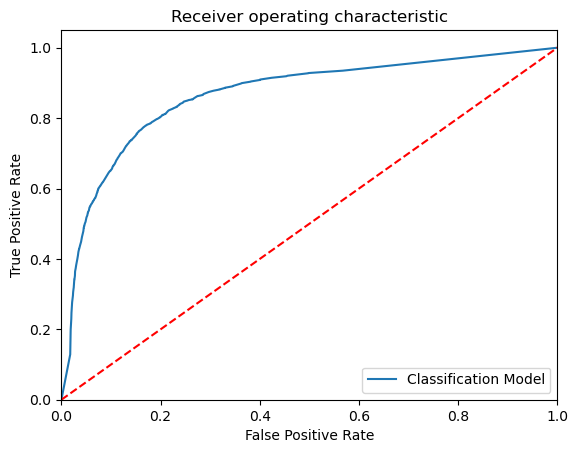

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 1783  1637]
 [  779 10454]]
Outcome values : 
 1783 1637 779 10454
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.52      0.60      3420
           0       0.86      0.93      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.78      0.73      0.75     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 83.5 %
Precision : 69.6 %
Recall : 52.1 %
F1 Score : 0.596
Specificity or True Negative Rate : 93.1 %
Balanced Accuracy : 72.6 %
MCC : 0.503
roc_auc_score: 0.726


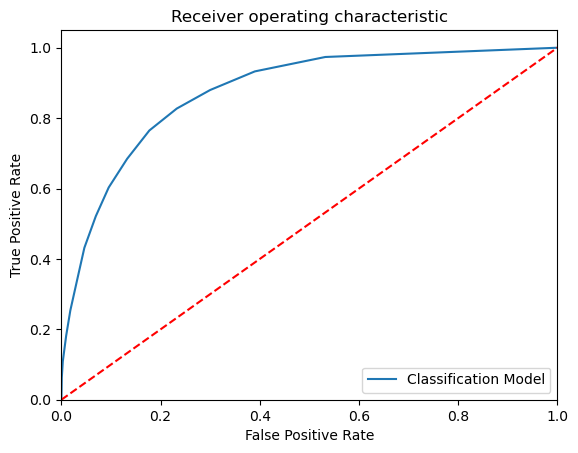

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', kernel='poly', probability=True, random_state=42)
Confusion matrix : 
 [[3019  401]
 [3167 8066]]
Outcome values : 
 3019 401 3167 8066
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.88      0.63      3420
           0       0.95      0.72      0.82     11233

    accuracy                           0.76     14653
   macro avg       0.72      0.80      0.72     14653
weighted avg       0.84      0.76      0.77     14653

Accuracy : 75.7 %
Precision : 48.8 %
Recall : 88.3 %
F1 Score : 0.629
Specificity or True Negative Rate : 71.8 %
Balanced Accuracy : 80.0 %
MCC : 0.515
roc_auc_score: 0.8


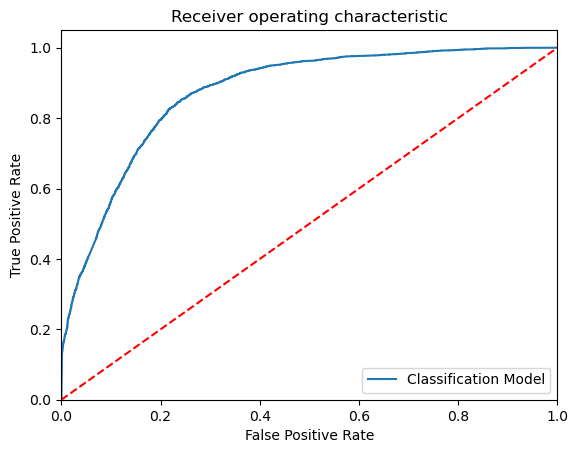

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 1066  2354]
 [  548 10685]]
Outcome values : 
 1066 2354 548 10685
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.31      0.42      3420
           0       0.82      0.95      0.88     11233

    accuracy                           0.80     14653
   macro avg       0.74      0.63      0.65     14653
weighted avg       0.78      0.80      0.77     14653

Accuracy : 80.2 %
Precision : 66.0 %
Recall : 31.2 %
F1 Score : 0.424
Specificity or True Negative Rate : 95.1 %
Balanced Accuracy : 63.2 %
MCC : 0.355
roc_auc_score: 0.631


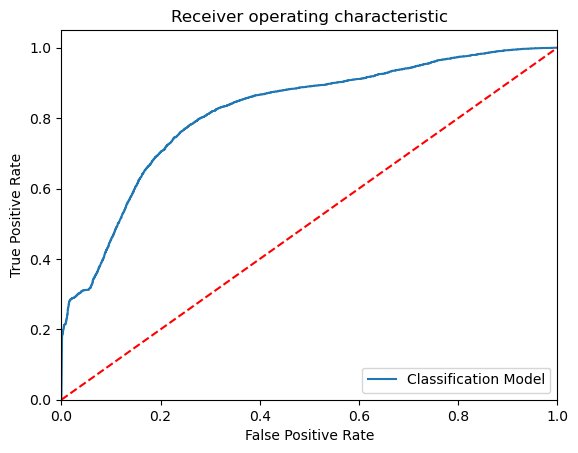

-----------------------------------------------------------------------------------------------------


In [26]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=14)
ModelSVM = SVC(kernel='poly', random_state = 42, class_weight='balanced', probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [27]:
EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),1064,2356,458,10775,0.808,0.699,0.311,0.431,0.959,0.375,0.635169,0.635
1,DecisionTreeClassifier(),2142,1278,1354,9879,0.820,0.613,0.626,0.619,0.879,0.502,0.752889,0.752
2,"(DecisionTreeClassifier(max_features='auto', r...",2198,1222,896,10337,0.855,0.710,0.643,0.675,0.920,0.583,0.781463,0.782
3,"(ExtraTreeClassifier(random_state=114900472), ...",2113,1307,937,10296,0.847,0.693,0.618,0.653,0.917,0.557,0.767211,0.768
4,KNeighborsClassifier(n_neighbors=14),1783,1637,779,10454,0.835,0.696,0.521,0.596,0.931,0.503,0.725998,0.726
5,"SVC(class_weight='balanced', kernel='poly', pr...",3019,401,3167,8066,0.757,0.488,0.883,0.629,0.718,0.515,0.800406,0.800
6,GaussianNB(),1066,2354,548,10685,0.802,0.660,0.312,0.424,0.951,0.355,0.631456,0.632


In [28]:
y_predRF=ModelRF.predict(x_test)

In [29]:
Results=pd.DataFrame({'income_A':y_test,'income_P':y_predRF})

ResultsFinal=data_bk.merge(Results,left_index=True,right_index=True)

ResultsFinal.sample(10)

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_A,income_P
19473,19474,71,Private,157909,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,2964,0,60,United-States,<=50K,0,0
196,197,44,Private,299197,Some-college,10,Never-married,Transport-moving,Not-in-family,White,Male,0,0,45,United-States,<=50K,0,0
13757,13758,57,Private,513440,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,Mexico,<=50K,0,1
4880,4881,48,Private,259873,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K,0,1
20214,20215,28,Private,250679,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,0,0
39668,39669,48,Private,102597,Some-college,10,Separated,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K,0,0
11072,11073,29,Private,283227,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0
7873,7874,22,Local-gov,175586,HS-grad,9,Never-married,Transport-moving,Own-child,Black,Female,0,0,20,United-States,<=50K,0,0
43467,43468,20,Private,386864,10th,6,Never-married,Other-service,Other-relative,White,Male,0,0,35,Mexico,<=50K,0,0
20402,20403,49,Private,87928,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K,1,0
